# cycle through each of the directories and plot the individual spectra
#### 1/10/22 jpw

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import csv
import scipy as sp
%matplotlib inline

In [2]:
# customize plots
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth'] = 2

In [13]:
# function to look at all the spectra in a directory (e.g., lon60) to check for interference
# if you see anything bad, delete the file manually (or rename to something like prefix.csv_bad) before proceeding
def inspect(directory):
    files = glob.glob(directory + '/*.csv')
    nfiles = len(files)
    if nfiles == 0:
        print('No files found in directory ', directory)
        return 0
    else:
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot(111)
    
        for n,f in enumerate(files):
            nu1, C1 = np.genfromtxt(f, delimiter=',', unpack=True)
            ax.plot(nu1, C1)
            label = f.split('/')[1][:22]
            ax.set_title(label, fontsize=14)
            ax.text(0.1, 0.9, directory, fontsize=24, transform=ax.transAxes)
            ax.set_ylim(0,100)
        plt.savefig(directory+'_spectra.png', dpi=300)
        #plt.clf()
    return directory, nfiles

In [14]:
# go to directory with the calibration data
path = '/Users/jpw/NG/HI/data/airspy_spectra/'
path = '/Users/jpw/nooelec_spectra'
os.chdir(path)
#date = '2021_12_01'
#os.chdir(path+date)
filelist = os.listdir()
#print(filelist)

No files found in directory  all_spectra.png
No files found in directory  .DS_Store
No files found in directory  long_spectra.png
No files found in directory  short_spectra.png


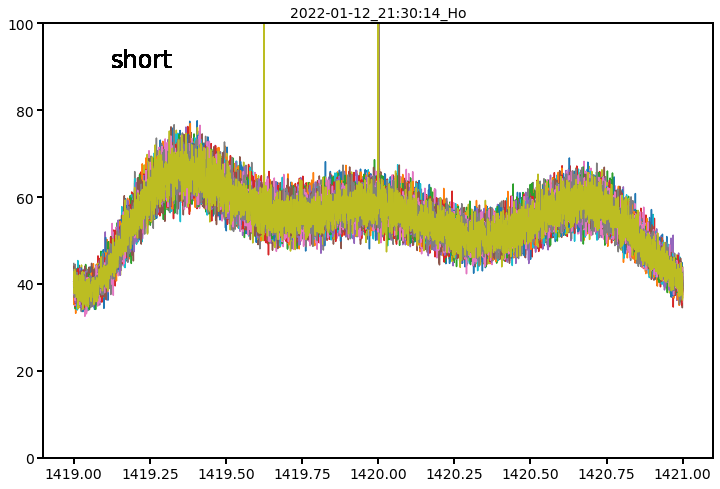

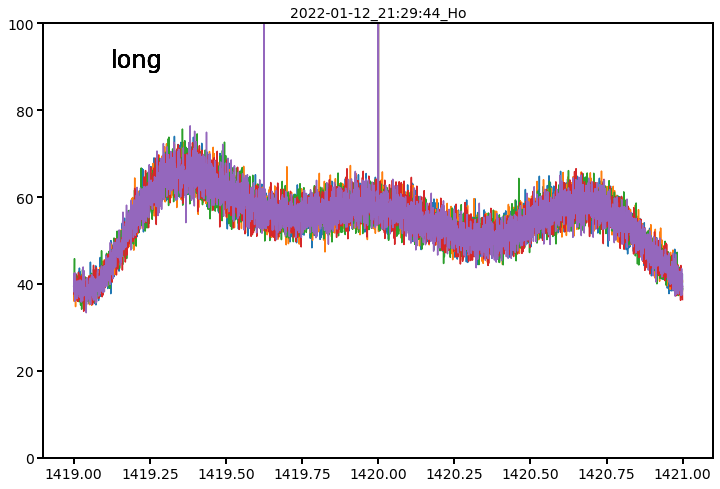

In [15]:
for f in filelist:
    #print(f)
    inspect(f)